<a href="https://colab.research.google.com/github/lldckv/cs102/blob/homework06/homework06/%D0%94%D1%8C%D1%8F%D1%87%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9B%D0%B0%D0%B16_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПОДГОТОВКА



In [7]:
install.packages("googledrive")
install.packages("httpuv")
library("googledrive")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘promises’, ‘later’




In [8]:
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [23]:
install.packages("dplyr")
library("dplyr")
install.packages("tidyr")
library('tidyr')
install.packages('gridExtra')
library(gridExtra)
install.packages("ggplot2")
library("ggplot2")
install.packages("corrplot")
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [42]:
#1
music <- data.frame(read.csv('/music_genre.csv'))
#2
music_sample_full <- sample_n(music, 20000, replace = FALSE)
#3
if (any(duplicated(music_sample_full))) {
  music_sample_full <- music_sample_full[!duplicated(music_sample_full), ]
}
#4
cat(paste("Строк без артистов: ", nrow(music_sample_full[music_sample_full$artist_name == "empty_field", ])), "\n")
music_sample <- music_sample_full[!(music_sample_full$artist_name == "empty_field"), ]
head(music_sample)

Строк без артистов:  1033 


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,90400,Cody Jinks,Cast No Stones,56,0.00775,0.498,316020,0.537,3.24e-03,G#,0.1050,-6.602,Major,0.0292,122.965,3-Apr,0.298,Rock
2,65623,Comethazine,My Way,54,0.01510,0.885,-1,0.466,0.00e+00,C#,0.1490,-9.369,Major,0.4600,139.966,4-Apr,0.360,Hip-Hop
4,78939,Ajmw,OldTricks,44,0.27800,0.765,176551,0.427,5.94e-01,B,0.1410,-9.824,Minor,0.0498,87.001,4-Apr,0.630,Jazz
5,66403,Kenny Chesney,Boston,46,0.72200,0.671,256360,0.545,9.72e-06,G,0.0959,-10.976,Major,0.0448,165.908,4-Apr,0.587,Country
6,38192,Leikeli47,Mulita,43,0.03060,0.873,-1,0.562,6.76e-04,B,0.1270,-6.252,Minor,0.2670,108.65299999999999,4-Apr,0.681,Alternative
7,22598,Luke Bryan,"Sunrise, Sunburn, Sunset",69,0.18500,0.472,216093,0.884,0.00e+00,A,0.1780,-2.306,Major,0.0584,159.96,4-Apr,0.718,Country


# Задание 2


1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

         genre frequency
2  Alternative  9.580807
3        Anime 10.071184
4        Blues  9.881360
5    Classical 10.139731
6      Country 10.044819
7   Electronic 10.271553
8      Hip-Hop 10.176641
9         Jazz 10.118640
10         Rap  9.912998
11        Rock  9.796994


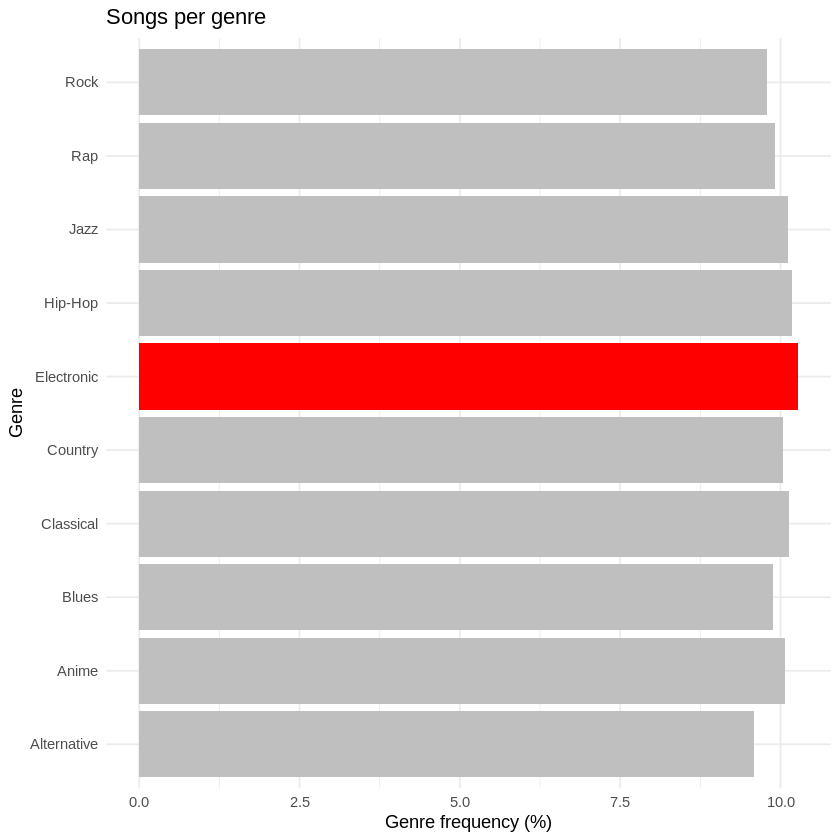

In [126]:
#1
genres_amount <- table(music_sample$music_genre)
genre_fraction <- 100 * genres_amount / nrow(music_sample)
genre_fraction_df <- data.frame(genre = names(genre_fraction), frequency = as.vector(genre_fraction))
genre_fraction_df <- genre_fraction_df[genre_fraction_df$genre != "", ]
print(genre_fraction_df)
#2
p1 <- ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = "#bfbfbf") +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

tallest_freq <- max(genre_fraction_df$frequency)
tallest_genre <- genre_fraction_df[genre_fraction_df$frequency == tallest_freq, 1]

ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = ifelse(genre_fraction_df$genre == tallest_genre, "red", "#bfbfbf")) +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

In [117]:
#3
genres <- music_sample$music_genre
genre_means <- tapply(music_sample$danceability, music_sample$music_genre, mean)
max_genre <- names(which.max(genre_means))
cat(paste("Название жанра с самым высоким показателем танцевальности:", max_genre))


Название жанра с самым высоким показателем танцевальности: Hip-Hop

In [118]:
#4
genres <- unique(genre_fraction_df$genre)
for (i in 1:length(genres)) {
  r <- music_sample[music_sample$music_genre == genres[i], "mode"]
  minor_cnt <- sum(r == "Minor", na.rm = TRUE)
  major_cnt <- sum(r == "Major", na.rm = TRUE)
  if (minor_cnt > major_cnt) {
    cat(paste(genres[i], ", Minor преобладает: ", minor_cnt, ">", major_cnt, "\n"))
  } else {
    cat(paste(genres[i], ", Major преобладает: ", minor_cnt, "<", major_cnt, "\n"))
  }
}

Alternative , Major преобладает:  672 < 1145 
Anime , Major преобладает:  757 < 1153 
Blues , Major преобладает:  536 < 1338 
Classical , Major преобладает:  621 < 1302 
Country , Major преобладает:  231 < 1674 
Electronic , Major преобладает:  880 < 1068 
Hip-Hop , Major преобладает:  873 < 1057 
Jazz , Major преобладает:  907 < 1012 
Rap , Major преобладает:  833 < 1047 
Rock , Major преобладает:  472 < 1386 


# Задание 3


1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.


Исполнитель с самым большим количеством треков: Wolfgang Amadeus Mozart
Исполнитель с самым маленьким количеством треков: [dunkelbunt]


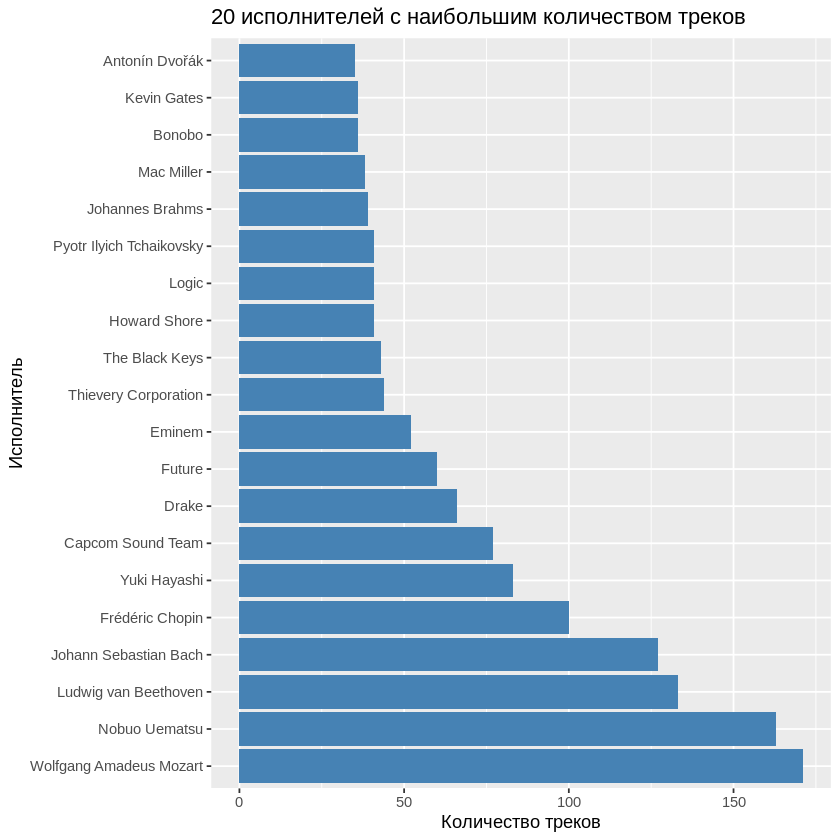

In [119]:
#1
tracks_count <- data.frame(table(music_sample[!music_sample$artist_name == "", ]$artist_name))
tracks_count <- tracks_count[order(tracks_count$Freq, decreasing = TRUE),]
cat(paste("Исполнитель с самым большим количеством треков:", tracks_count[which.max(tracks_count$Freq), "Var1"]))
cat("\n")
cat(paste("Исполнитель с самым маленьким количеством треков:", tracks_count[which.min(tracks_count$Freq), "Var1"]))
cat("\n")
#2
top_artists <- head(tracks_count, 20)
ggplot(top_artists, aes(x = reorder(Var1, -Freq), y = Freq)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(x = "Исполнитель", y = "Количество треков") +
  ggtitle("20 исполнителей с наибольшим количеством треков")

# Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [120]:
#1
is_numeric <- function(x) is.numeric(x)
numeric_cols <- sapply(music_sample, is_numeric)
cor(x = as.matrix(music_sample[c(names(music_sample)[numeric_cols])]), method = "pearson", use = "pairwise.complete.obs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000000,0.00573634,-0.00381260,-0.006966736,0.002661188,0.009859555,-0.01004803,0.006877513,0.003573232,-0.01365238,0.004419574
popularity,0.005736340,1.00000000,-0.29540212,0.362083620,-0.084858046,0.217909034,-0.37309191,-0.050341808,0.321022763,0.22448128,0.125888868
acousticness,-0.003812600,-0.29540212,1.00000000,-0.357008111,0.068848432,-0.796135361,0.38594084,-0.110671244,-0.732307745,-0.16069182,-0.283463988
danceability,-0.006966736,0.36208362,-0.35700811,1.000000000,-0.158118369,0.271162055,-0.30238400,-0.048604766,0.394194094,0.27957997,0.443680374
duration_ms,0.002661188,-0.08485805,0.06884843,-0.158118369,1.000000000,-0.074856002,0.14142105,0.017098956,-0.110350433,-0.09750945,-0.130163977
energy,0.009859555,0.21790903,-0.79613536,0.271162055,-0.074856002,1.000000000,-0.38110626,0.184929870,0.839042753,0.15395706,0.401206518
instrumentalness,-0.010048029,-0.37309191,0.38594084,-0.302383999,0.141421054,-0.381106257,1.00000000,-0.094133503,-0.522656159,-0.19665204,-0.258578742
liveness,0.006877513,-0.05034181,-0.11067124,-0.048604766,0.017098956,0.184929870,-0.09413350,1.000000000,0.124146394,0.11630784,0.047695721
loudness,0.003573232,0.32102276,-0.73230774,0.394194094,-0.110350433,0.839042753,-0.52265616,0.124146394,1.000000000,0.16268159,0.342766511
speechiness,-0.013652379,0.22448128,-0.16069182,0.279579968,-0.097509453,0.153957062,-0.19665204,0.116307835,0.162681594,1.00000000,0.054338767


In [121]:
#2
music_sample$track_name_length <- nchar(music_sample$track_name)
cor(music_sample$popularity, music_sample$track_name_length, method = "pearson", use = "pairwise.complete.obs")
music_sample <- subset(music_sample, select = -track_name_length)

[1] -0.2303134

# Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?


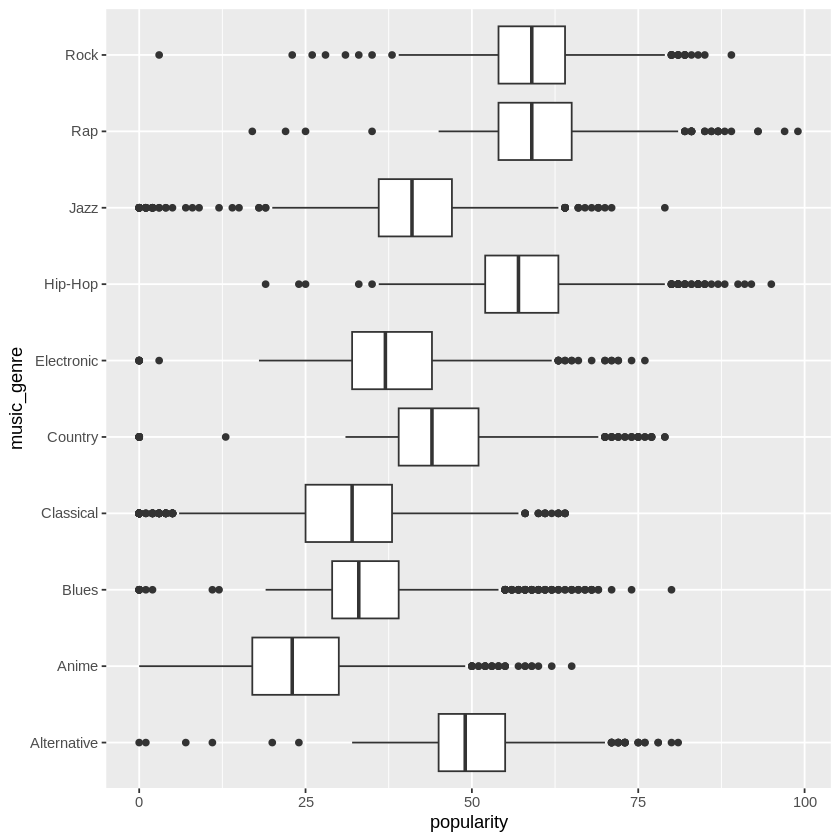

In [127]:
music_sample_g=music_sample[music_sample$music_genre != "", ]
ggplot(music_sample_g, aes(x = popularity, y = music_genre)) + 
  geom_boxplot()

# Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

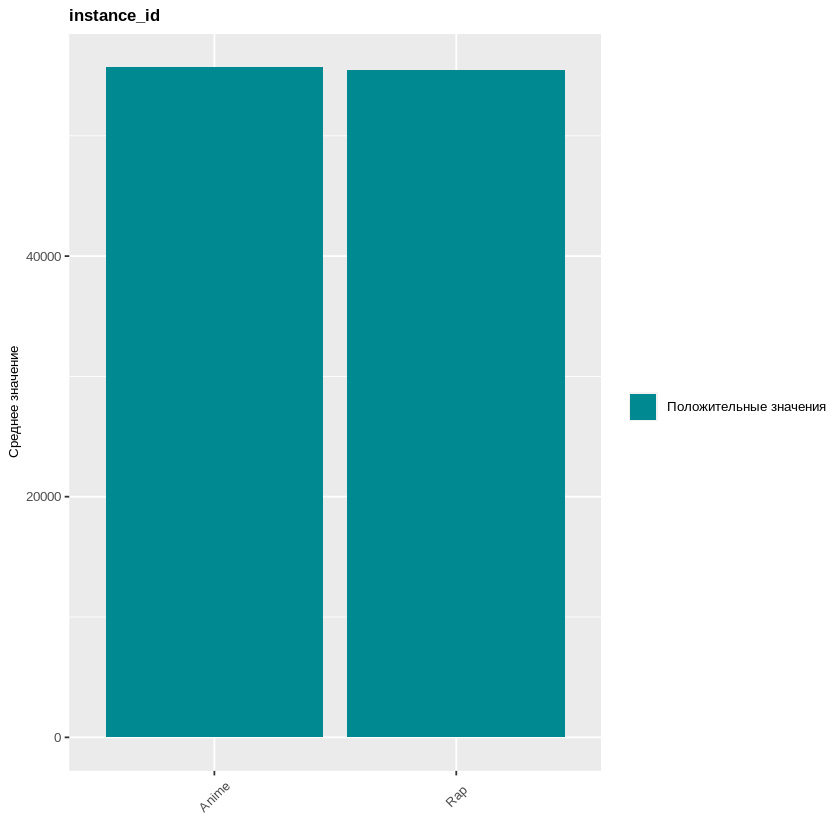

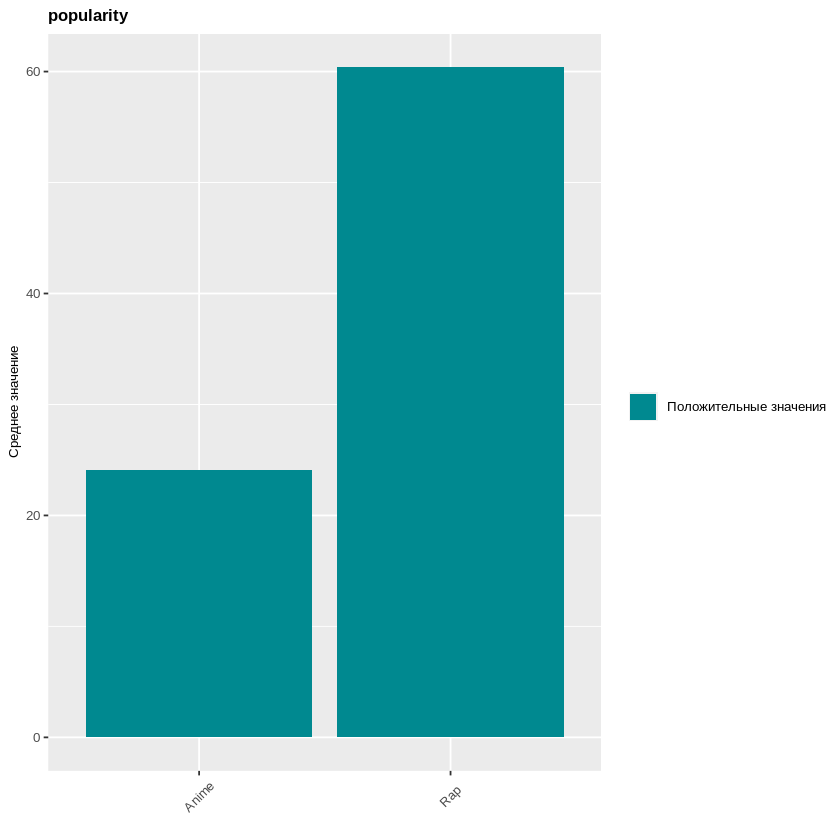

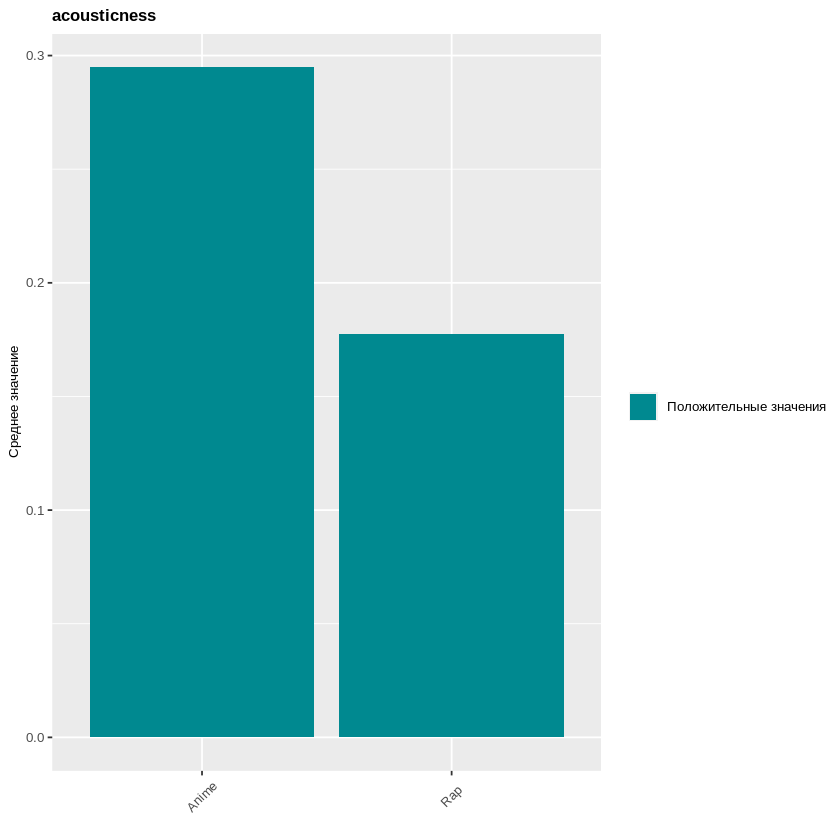

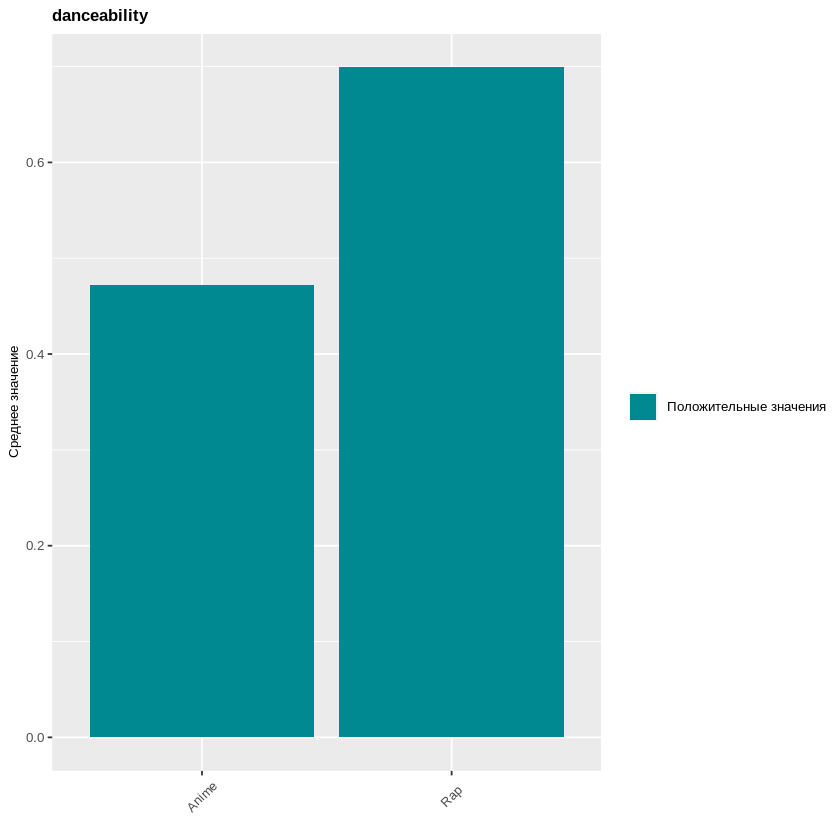

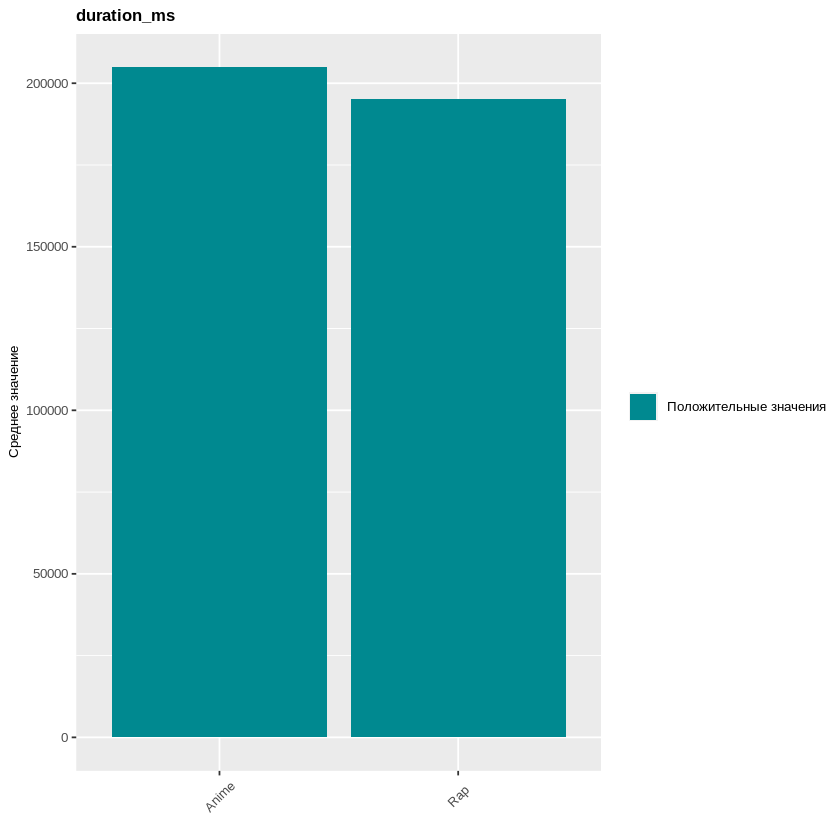

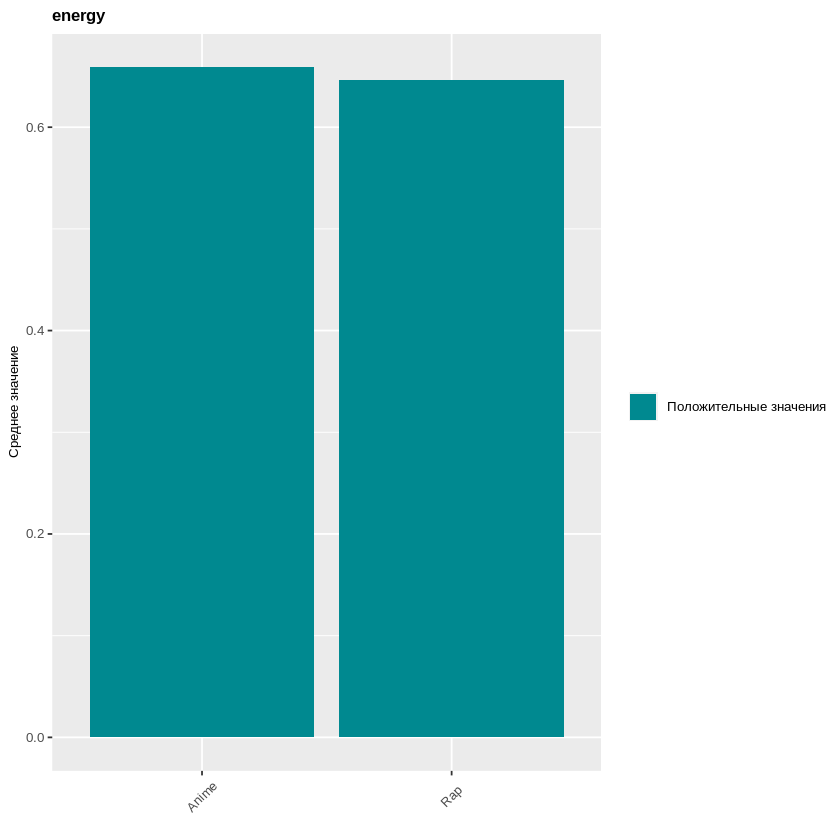

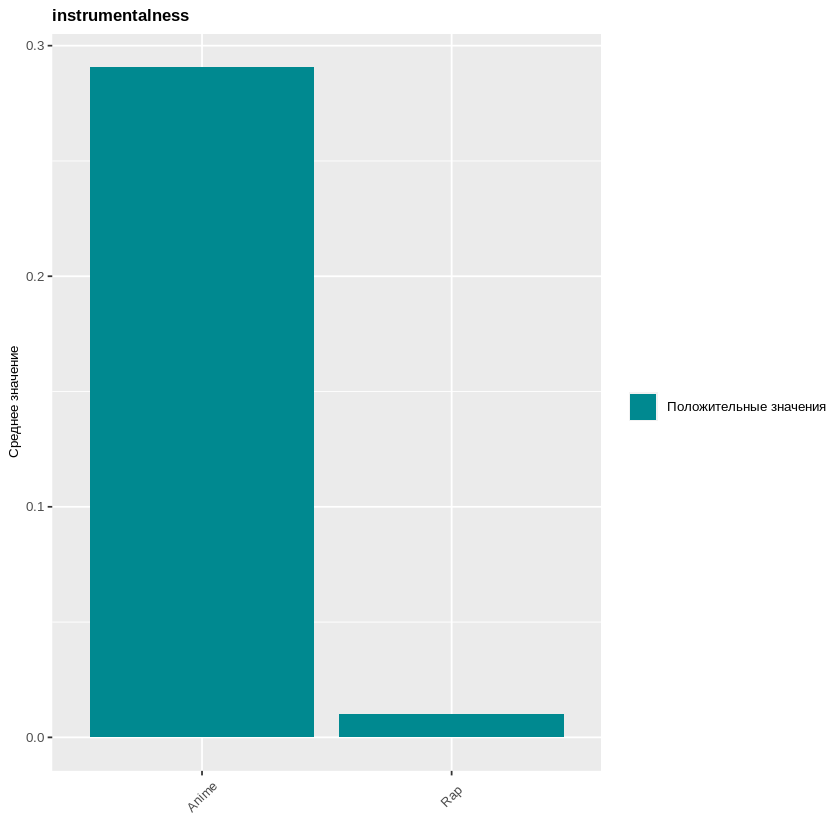

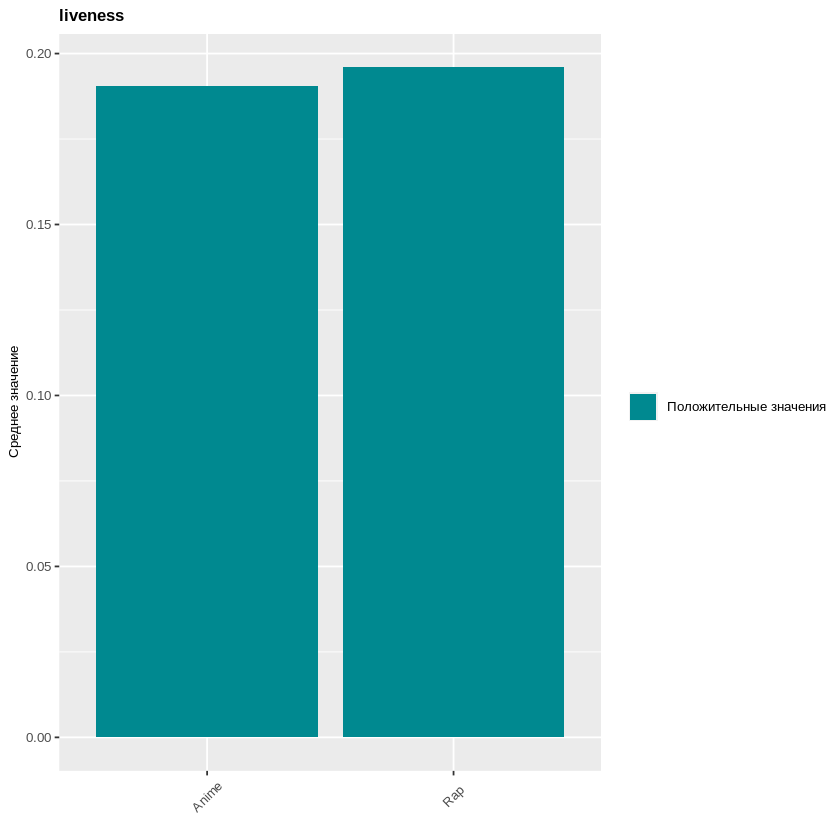

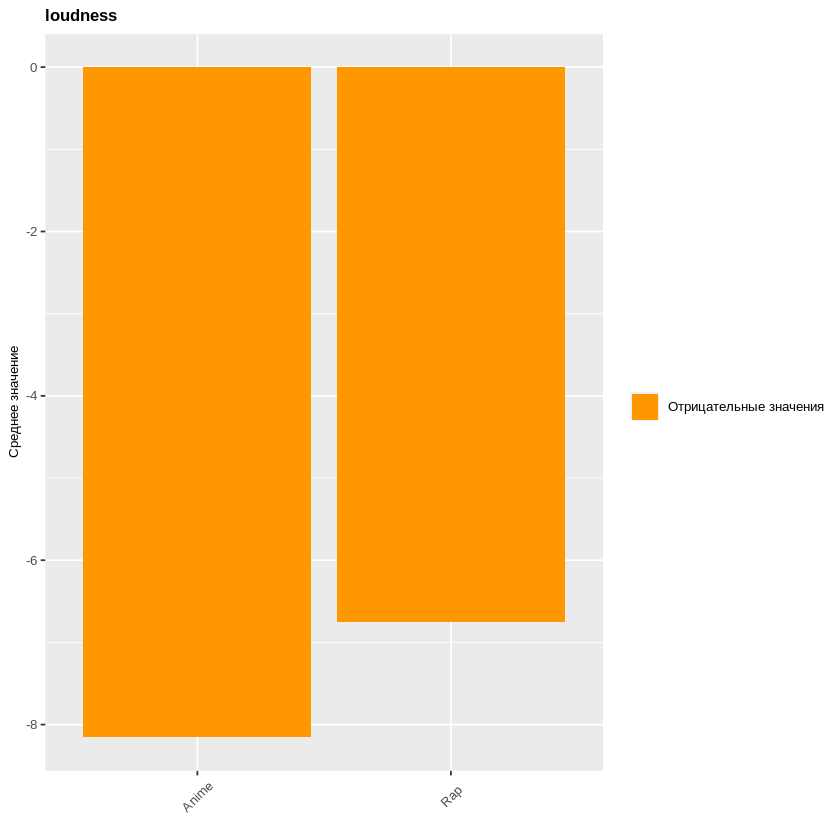

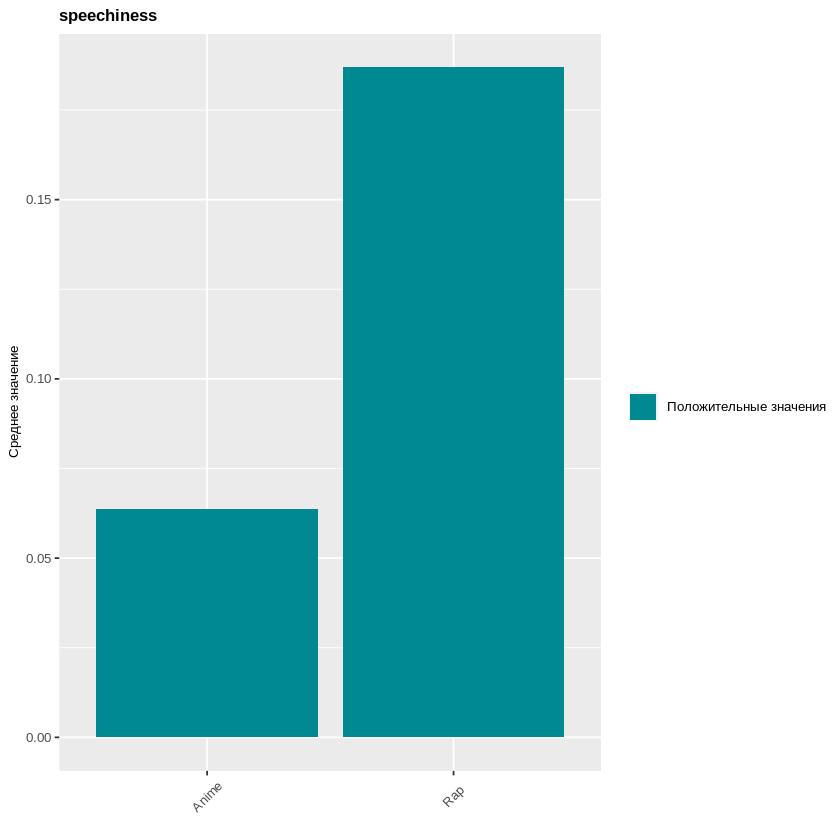

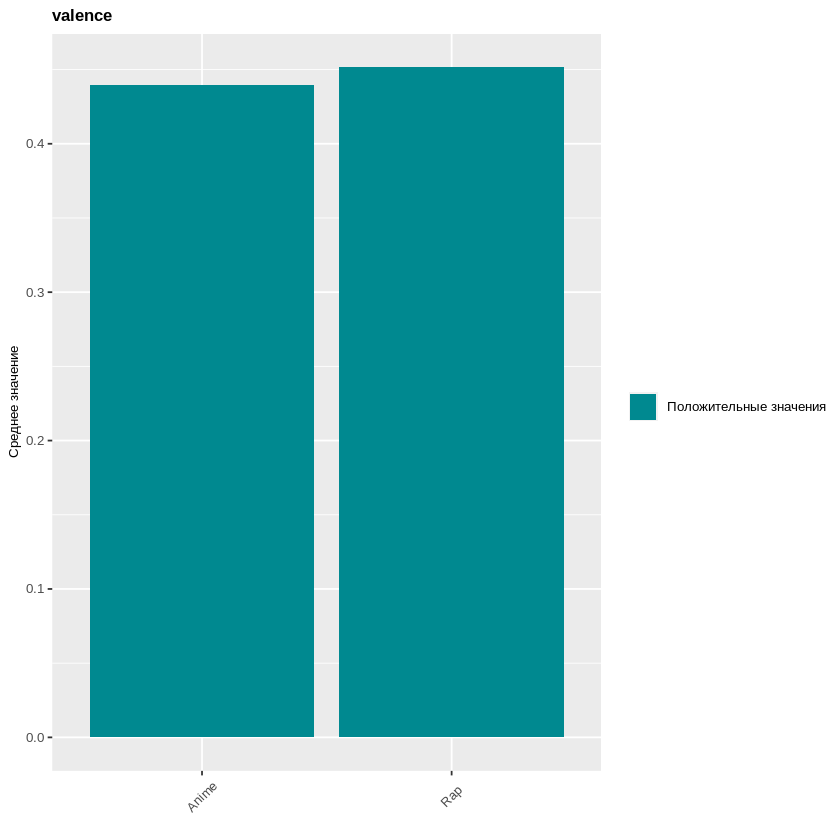

In [161]:
popular_genre <- names(which.max(tapply(music_sample$popularity, music_sample$music_genre, mean)))
unpopular_genre <- names(which.min(tapply(music_sample$popularity, music_sample$music_genre, mean)))

numeric_columns <- sapply(music_sample, is.numeric)
numeric_music_sample <- music_sample[, numeric_columns]

means_by_genre <- music_sample %>%
  group_by(music_genre) %>%
  summarise(across(where(is.numeric), mean)) %>%
  pivot_longer(cols = -music_genre)

# отбираем только нужные жанры
means_by_genre <- means_by_genre %>%
  filter(music_genre == popular_genre | music_genre == unpopular_genre)

# задаем цвета для положительных и отрицательных значений
color_scale <- scale_fill_manual(
  values = c("#008990", "#FF9800"),
  breaks = c(FALSE, TRUE),
  labels = c("Положительные значения", "Отрицательные значения")
)

# проходимся по каждой колонке и строим для нее график
for (col_name in unique(means_by_genre$name)) {
  # отфильтровываем нужные данные для колонки
  col_data <- subset(means_by_genre, name == col_name)

  # строим график
  g <- ggplot(col_data, aes(x = music_genre, y = value, fill = value < 0)) +
    geom_col(position = "dodge") +
    color_scale +
    labs(
      title = col_name,
      x = "",
      y = "Среднее значение"
    ) +
    theme(
      axis.text.x = element_text(angle = 45, vjust = 0.5),
      axis.text = element_text(size=8),
      axis.title = element_text(size=8),
      legend.title = element_blank(),
      legend.text = element_text(size = 8),
      plot.title = element_text(face = "bold", size = 10)
    ) +
    guides(fill = guide_legend(reverse = TRUE))

  # выводим график
  print(g)
}

# Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме покажите численное соотношение треков разной длительности.

In [186]:
#1
music_sample$длительность_трека <- ifelse(music_sample$duration_ms > 300000, "длинная", ifelse(music_sample$duration_ms > 180000 & music_sample$duration_ms <= 300000, "средняя", "короткая"))
head(music_sample, 10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,90400,Cody Jinks,Cast No Stones,56,0.00775,0.498,316020,0.537,3.24e-03,G#,0.1050,-6.602,Major,0.0292,122.965,3-Apr,0.298,Rock,длинная
2,65623,Comethazine,My Way,54,0.01510,0.885,-1,0.466,0.00e+00,C#,0.1490,-9.369,Major,0.4600,139.966,4-Apr,0.360,Hip-Hop,короткая
4,78939,Ajmw,OldTricks,44,0.27800,0.765,176551,0.427,5.94e-01,B,0.1410,-9.824,Minor,0.0498,87.001,4-Apr,0.630,Jazz,короткая
5,66403,Kenny Chesney,Boston,46,0.72200,0.671,256360,0.545,9.72e-06,G,0.0959,-10.976,Major,0.0448,165.908,4-Apr,0.587,Country,средняя
6,38192,Leikeli47,Mulita,43,0.03060,0.873,-1,0.562,6.76e-04,B,0.1270,-6.252,Minor,0.2670,108.65299999999999,4-Apr,0.681,Alternative,короткая
7,22598,Luke Bryan,"Sunrise, Sunburn, Sunset",69,0.18500,0.472,216093,0.884,0.00e+00,A,0.1780,-2.306,Major,0.0584,159.96,4-Apr,0.718,Country,средняя
8,86710,keshi,just friends,67,0.76700,0.713,123126,0.244,4.35e-03,F#,0.1010,-15.639,Minor,0.1010,119.993,4-Apr,0.199,Rap,короткая
9,35394,Kuzu Mellow,Sunflower Feelings,68,0.75600,0.824,88644,0.448,3.50e-05,C,0.1260,-14.694,Major,0.0945,129.989,4-Apr,0.565,Rap,короткая
10,85221,Belly,Immigrant,54,0.55600,0.698,232853,0.835,0.00e+00,C#,0.2090,-4.847,Minor,0.4140,89.11,4-Apr,0.646,Rap,средняя


Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


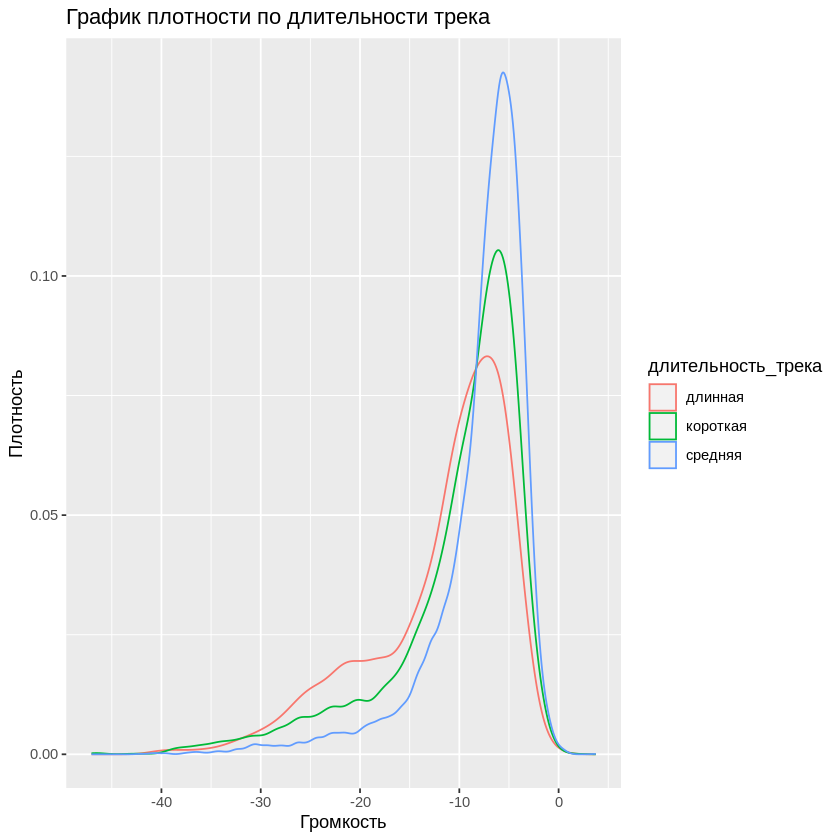

In [181]:
#2
plot <- ggplot(music_sample, aes(x = loudness, color = длительность_трека)) + 
    geom_density()  +
    xlab("Громкость") + 
    ylab("Плотность") + 
    ggtitle("График плотности по длительности трека")
plot

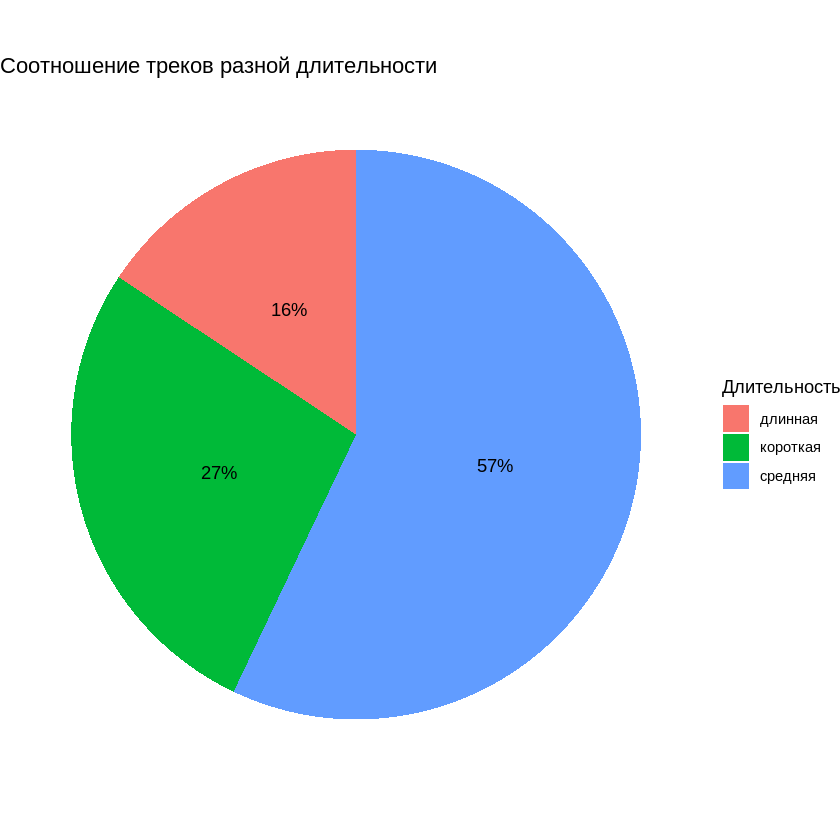

In [185]:
#3
duration_counts <- table(music_sample$длительность_трека)
df <- data.frame(duration=names(duration_counts), counts=as.numeric(duration_counts))
ggplot(df, aes(x="", y=counts, fill=duration)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(round(counts/sum(counts)*100),"%")), position = position_stack(vjust = 0.5)) +
  theme_void() +
  labs(title="Cоотношение треков разной длительности",
       fill="Длительность")